# Задача 2

Используя методы дихотомии, простых итераций и Ньютона, найти уровень энергии $E$ основного состояния квантовой частицы в прямоугольной потенциальной яме

$$ -\frac{\hbar^2}{2m}\psi''(x) + U(x)\psi(x) = E\psi(x) $$

$$ U(x) = -U_0, |x| \leq a $$


Делаем сшивку решений в яме и внутри ямы в точке $a$. В итоге получаем уравнение на энергию: 

$$ \sqrt{\frac{1}{y} - 1} = ctg \sqrt{\frac{2 m a^2 U_0}{\hbar^2}(1 - y)} , $$ 
$$ y = \frac{-E}{U_o} $$

Тогда уравнение: $f(y) = 0$

$$f(y) =  \sqrt{\frac{1}{y} - 1} - ctg \sqrt{\frac{2 m a^2 U_0}{\hbar^2}(1 - y)}$$

$$ 0 < y < 1 $$
$$ E < 0, |E| < U_0 $$

In [20]:
import math
import matplotlib.pyplot as plt
import sys
import numpy as np

### Задам параметры численно

In [438]:
a_quant = 1e-12 #cm
U_0 = 50 * 1e6 * 1.6e-12 #50 MeV -> erg (g * cm^2 / s^2)
m = 9.1e-28 #g 
h = 1.054e-27 #erg*s
epsilon = 2.220446049250313e-16

### Определю функцию  f(y)

In [439]:
class Func_F:
    def __init__(self, a, U_0, m, h):
        self.a = a
        self.U_0 = U_0
        self.m = m
        self.h = h
        self.const = 2*self.a*self.a*self.m*self.U_0/(self.h*self.h)
        
    
    def f(self, y):
        return np.sqrt(1/y - 1) - 1/np.tan(np.sqrt(self.const*(1 - y)))
    
    def f_der(self, y):
        return -(self.const/(2*np.sqrt(1 - y)*(np.sin(self.const*np.sqrt(1 - y)))**2) + 1/(2*np.sqrt(1/y - 1)*y*y))

In [440]:
func_f = Func_F(a_quant, U_0, m, h)

In [441]:
func_f.f(0.5)

-2.820678359790789

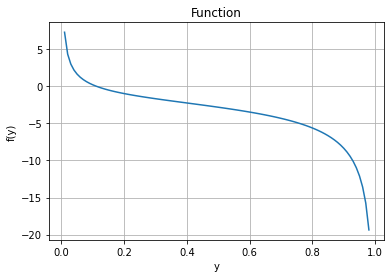

In [442]:
y1 = np.arange(0.01, 0.99, 0.01)
plt.plot(y1, func_f.f(y1))
plt.grid()
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Function')
plt.show()

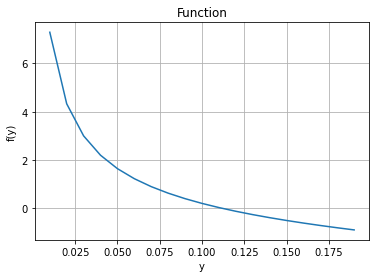

In [443]:
y1 = np.arange(0.01, 0.2, 0.01)
plt.plot(y1, func_f.f(y1))
plt.grid()
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Function')
plt.show()

## Метод дихотомии

"Условие выхода из цикла итераций должно быть
основано на сравнении ширины отрезка и требуемой точности (не пре-
восходящей точность, обеспечиваемую используемым типом данных с
плавающей точкой)." 

Максимальная абсолютная погрешность определения корня $x_*$ равна $\frac{1}{2}(b − a) $ и на каждой итерации уменьшается вдвое.

Каждый шаг дихотомии даёт один дополнительный бит мантиссы. Это позволяет оценить необходимое число шагов для достижения требуемой точности:

$$ N \approx \frac{log(\delta_0/\delta)}{log2} , $$

где $\delta_0$ и $\delta$ — точность начального приближения и требуемая точность нахождения корня соответственно.

In [462]:
#начальная и требуемая точность
d_0 = 0.1
d = 0.000000001

prec = int(-np.log10(d))
print(prec)

#число итераций
N = round(np.log10(d_0/d)/np.log10(2))
print(N)

#начальные границы отрезка
a = 0.1
b = 0.125

print(func_f.f(a)*func_f.f(b) < 0)

8
23
True


In [463]:
f_a = func_f.f(a)
f_b = func_f.f(b)

mids = []

for i in range(N):
    
    mid = (a + b)/2
    f_mid = func_f.f(mid)
    
    if (f_a*f_mid <= 0):
        
        b = mid
        f_b = func_f.f(b)
            
    elif (f_mid*f_b <= 0):
        
        a = mid
        f_a = f_mid
        
    mids.append((a + b)/2)
    
    #print(i)
        
    if (np.abs(f_a - 0) < d):
            root = a
            #print('aaa')
            break
    if (np.abs(f_b - 0) < d):
            root = b
            #print('bbb')
            break        
    
root_dichotomy = (a+b)/2

In [464]:
print("root: "+"%.8f" % (root_dichotomy))

root: 0.11194503


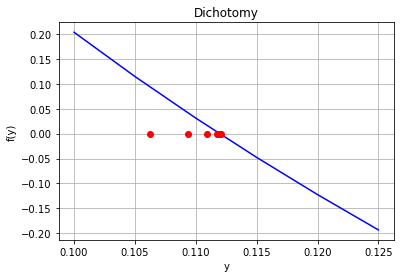

In [465]:
y1 = np.arange(0.1, 0.13, 0.005)
plt.plot(y1, func_f.f(y1), 'b', mids, [0 for i in range(len(mids))], 'ro')
plt.grid()
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Dichotomy')
plt.show()

## Метод итераций

In [448]:
func_f.f_der(root_dichotomy)

-18.74769365301527

Модуль значения производной явно не < 1, значит надо пользоваться модификацией метода. Переход к обратной функции - сложно. Буду пользоваться введением корректирующего множителя $\lambda$. 

$$|f'(y)| < \inf $$

При правильном выборе $\lambda$ будет сходиться итерационный процесс

$$ y_{n+1} = y_n - \lambda f(y_n) $$

Знак $\lambda$ нужно выбирать равным знаку производной, а значение - по возможности ближе к $1/f'(y_*)$

Выход из цикла итераций можно осуществлять, проверяя условие
малости изменения $y$ на последней итерации: $|y_n − y_{n−1} | < \delta$ , где $\delta$ —требуемая точность.

In [466]:
lmbd = 1/func_f.f_der(0.1)
print(lmbd)

-0.04726367785888994


In [467]:
y_n_prev = 0.1 #n-1
y_n = 0.11 #n

d = 0.00000001

y_s_iter = []
counter_iter = 0


while(np.abs(y_n - y_n_prev) > d):
    tmp = y_n
    y_n = y_n_prev - lmbd*func_f.f(y_n_prev)
    y_n_prev = tmp
    y_s_iter.append(y_n)
    counter_iter += 1
    
    #print(y_n)
    
print(y_n)
print("Iterations:", counter_iter)
root_iter = y_n

0.1119449928237321
Iterations: 17


In [468]:
print("root: "+"%.8f" % (root_iter))

root: 0.11194499


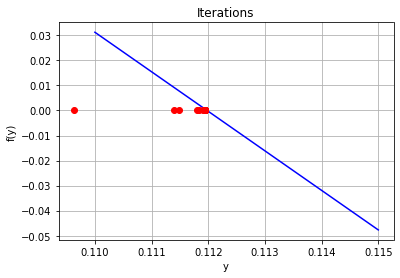

In [469]:
y1 = np.arange(0.11, 0.115, 0.005)
plt.plot(y1, func_f.f(y1), 'b', y_s_iter, [0 for i in range(len(y_s_iter))], 'ro')
plt.grid()
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Iterations')
plt.show()

## Метод Ньютона

Итерационный процесс:

$$ y_{n+1} = y_n - \frac{f(y_n)}{f'(y_n)} $$

In [459]:
y_n_prev = 0.1 #n-1
y_n = 0.11 #n

d = 0.00000001

y_s_Newton = []
counter_Newton = 0

while(np.abs(y_n - y_n_prev) > d):
    tmp = y_n
    y_n = y_n_prev - func_f.f(y_n_prev)/func_f.f_der(y_n_prev)
    y_n_prev = tmp
    y_s_Newton.append(y_n)
    counter_Newton += 1
    
    
    #print(y_n)
    
print(y_n)
print("Iterations:", counter_Newton)
root_Newton = y_n

0.1119449944103177
Iterations: 13


In [460]:
print("root: "+"%.8f" % (root_Newton))

root: 0.11194499


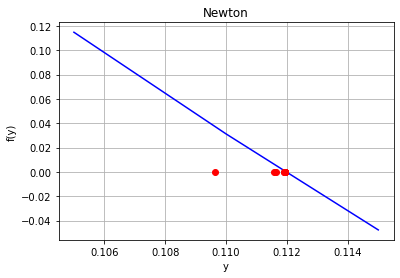

In [461]:
y1 = np.arange(0.105, 0.115, 0.005)
plt.plot(y1, func_f.f(y1), 'b', y_s_Newton, [0 for i in range(len(y_s_Newton))], 'ro')
plt.grid()
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Newton')
plt.show()